In [7]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
from collections import OrderedDict
from skimage import transform
import PIL
# from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION
from keras.datasets import mnist

# print(PIL.PILLOW_VERSION)

from sklearn.model_selection import train_test_split

In [22]:
(x_train, y_trains), (x_test, y_test) = mnist.load_data()

In [23]:
x_train, y_trains = np.array(x_train), np.array(y_trains)
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))

In [26]:
train = pd.read_csv('train.csv')
print(train.shape)
label =train['label'].values
# label =train['784'].values
data =train.drop(['label'], 1).values
# data =train.drop(['784', 'Unnamed: 0'], 1).values
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

(42000, 785)


In [52]:
train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [ ]:
def add_new(x_t, y_t):
    new_xt = []
    new_yt = []
    kru = np.zeros((28,5))
    for i in range(x_t.shape[0]):
        new_xt.append(np.concatenate((kru, x_t[i][:,:-5]), axis = 1))
        new_xt.append(x_t[i])
        new_xt.append(np.concatenate((x_t[i][:,5:], kru), axis = 1))
        new_yt.append(y_t[i])
        new_yt.append(y_t[i])
        new_yt.append(y_t[i])
#         break
        if i%30000 == 0:
            print(i/ x_t.shape[0])
        
    return np.array(new_xt), np.array(new_yt)

In [40]:
def add_new_image(x_t, y_t):
    new_xt = []
    new_yt = []
    for i in range(x_t.shape[0]):
        for angle in range(-30, 35, 15):
            a = np.reshape(x_t[i], (28, 28))
            a = np.float32(a)
            a = transform.rotate(a, angle)
            a = np.int_(a)
            new_xt.append(a)
            new_yt.append(y_t[i])
        if i%3000 == 0:
            print(i/ x_t.shape[0])
        
    return np.array(new_xt), np.array(new_yt)

In [41]:
X_train, y_train = add_new_image(X_train, y_train)

0.0
0.08928571428571429
0.17857142857142858
0.26785714285714285
0.35714285714285715
0.44642857142857145
0.5357142857142857
0.625
0.7142857142857143
0.8035714285714286
0.8928571428571429
0.9821428571428571


In [ ]:
X_train, y_train = add_new(X_train, y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 28*28))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
print(X_train.shape, y_train.shape)

(504000, 784) (504000, 1)


In [4]:
wer = pd.DataFrame(np.concatenate((X_train, y_train), axis = 1))
wer.to_csv('new_test.csv')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [27]:
X_train = np.concatenate((X_train, x_train), axis = 0)
y_train = np.concatenate([y_train, y_trains], axis = 0)

BATCH_SIZE = 128
print(y_train[:10])

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)

torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)


torch_X_train = torch_X_train.view(-1, 1,28,28).float()
torch_X_test = torch_X_test.view(-1,1,28,28).float()

train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

train_loader = torch.utils.data.DataLoader(train, batch_size= BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE)


[6 6 1 7 3 1 0 2 2 3]


In [9]:
for i, j in train_loader:
    print(np.mean(np.array(i)),np.mean(np.array(j)))

32.89481 3.90625
32.745415 4.671875
33.81208 4.40625
33.70454 4.4609375
33.126534 4.2109375
32.54841 5.09375
32.57675 4.78125
32.45498 4.578125
33.80443 4.5234375
36.218422 4.1953125
32.540157 4.578125
32.476383 4.4609375
33.771088 4.890625
33.874184 4.8203125
36.02646 4.4609375
34.177635 4.703125
33.729042 4.3359375
34.912758 4.6015625
34.458168 5.03125
34.030003 4.75
30.421776 4.671875
33.286682 4.8828125
35.259777 4.2109375
33.083607 3.953125
32.837013 4.46875
33.20153 4.671875
32.78405 4.5546875
33.79753 4.21875
32.696697 4.4453125
31.239407 4.171875
35.130253 4.5078125
32.930225 4.5546875
33.910225 4.5078125
33.612503 4.40625
33.531967 4.4765625
33.17669 4.6171875
32.75867 4.6796875
33.883022 4.0703125
32.50002 4.296875
34.6502 4.4921875
32.131157 4.4921875
34.564274 4.21875
32.33729 4.7890625
34.306602 4.1875
31.778042 4.7265625
32.087982 4.46875
33.418217 4.15625
33.532925 4.71875
32.492416 4.765625
32.527973 4.7578125
35.225826 4.0859375
33.912487 4.5
35.100956 4.4375
34.103348

In [11]:
class Alexnet(nn.Module):
    def __init__(self):
        super(Alexnet, self).__init__()
        

        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=4)
        self.batch1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5, padding=4)
        self.batch2 = nn.BatchNorm2d(32)
        
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.batch3 = nn.BatchNorm2d(64)
        
        
        self.conv4 = nn.Conv2d(64, 64, kernel_size=5, padding = 2)
        self.batch4 = nn.BatchNorm2d(64)
                 
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, padding = 2)
        self.batch5 = nn.BatchNorm2d(64)
        
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, padding = 2)
        self.batch6 = nn.BatchNorm2d(64)
        

        self.conv7 = nn.Conv2d(64, 128, kernel_size=3)
        
        self.conv8 = nn.Conv2d(128, 128, kernel_size=3)


        self.fc1 = nn.Linear(3 * 3 * 128, 2*128)
        self.fc2 = nn.Linear(2*128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.batch1(x)
        x = F.relu(self.conv2(x), 2)
        x = self.batch2(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x), 2)
        x = self.batch3(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv4(x), 2)
        x = self.batch4(x)
        x = F.relu(self.conv5(x), 2)
        x = self.batch5(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv6(x), 2)
        x = self.batch6(x)
        x = F.relu(self.conv7(x), 2)
        x = F.relu(self.conv8(x), 2)
        x = x.view(-1, 3 * 3 * 128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [66]:
X_train.shape

(93600, 784)

In [72]:
mlp = Alexnet()
print(mlp)

Alexnet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (batch5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (batch6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [28]:
def fit(model, train_x, train_y, loader, optimizer, EPOCH, error, batch):
        
    model.train()
    for epoch in range(EPOCH):
        correct = 0
        
        x, y = shuffle(train_x, train_y)
        for batch_idx in range(len(x)//batch + 1):
#             x_batch = np.array(x[batch*batch_idx : batch*(batch_idx +1)])
#             x_batch = np.array(x[33580: len(x)])
#             y_batch = np.array(y[33580: len(x)])
            x_batch = np.array(x[batch* batch_idx: min(len(x), batch*(batch_idx +1))])
            y_batch = np.array(y[batch* batch_idx: min(len(x), batch*(batch_idx +1))])
            x_batch = np.reshape(x_batch, (x_batch.shape[0], 1, 28, 28))
            if x_batch.shape[0] == 0:
                continue
            
            torch_x_train = torch.from_numpy(x_batch).type(torch.LongTensor)
            torch_y_train = torch.from_numpy(y_batch).type(torch.LongTensor)
        
            var_X_batch = Variable(torch_x_train).float()
            var_y_batch = Variable(torch_y_train)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            
            loss.backward()
            optimizer.step()
            
            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 100 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx* batch, len(train_y), 
                    100.*batch_idx * batch / len(train_y), loss.item(), 
                    float(correct*100) / float(batch*(batch_idx+1))))
        
        total_correct = 0
        for batch_idx, batch_idy in loader:
        
            images, labels = Variable(batch_idx).float(), Variable(batch_idy)

            output = model(images)

    #         avg_loss += loss(output, labels).sum()
            pred = np.argmax(output.data, axis = 1)
            total_correct += np.equal(pred,labels.data).sum()
        
        print('Epoch : {}\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, loss.item(), float(correct*100) / len(train_x)))
        print('Val Accuracy: %f' % (100*float(total_correct) / len(loader.dataset)))

In [55]:
optimizer = torch.optim.RMSprop(mlp.parameters(), lr = 0.0005)
EPOCHS = 20
error = nn.CrossEntropyLoss()
fit(mlp, X_train, y_train, test_loader, optimizer, EPOCHS, error, 128)

Epoch : 0 [0/93600 (0%)]	Loss: 0.000000	 Accuracy:100.000%
Epoch : 0 [12800/93600 (14%)]	Loss: 0.000000	 Accuracy:99.961%
Epoch : 0 [25600/93600 (27%)]	Loss: 0.000000	 Accuracy:99.957%
Epoch : 0 [38400/93600 (41%)]	Loss: 0.000000	 Accuracy:99.945%
Epoch : 0 [51200/93600 (55%)]	Loss: 0.000914	 Accuracy:99.957%
Epoch : 0 [64000/93600 (68%)]	Loss: 0.000001	 Accuracy:99.958%
Epoch : 0 [76800/93600 (82%)]	Loss: 0.000559	 Accuracy:99.958%
Epoch : 0 [89600/93600 (96%)]	Loss: 0.000000	 Accuracy:99.964%
Epoch : 0	Loss: 0.000000	 Accuracy:99.965%
Val Accuracy: 99.916667
Epoch : 1 [0/93600 (0%)]	Loss: 0.001411	 Accuracy:100.000%
Epoch : 1 [12800/93600 (14%)]	Loss: 0.000000	 Accuracy:99.961%
Epoch : 1 [25600/93600 (27%)]	Loss: 0.000000	 Accuracy:99.957%
Epoch : 1 [38400/93600 (41%)]	Loss: 0.000000	 Accuracy:99.958%
Epoch : 1 [51200/93600 (55%)]	Loss: 0.000005	 Accuracy:99.961%
Epoch : 1 [64000/93600 (68%)]	Loss: 0.000000	 Accuracy:99.967%
Epoch : 1 [76800/93600 (82%)]	Loss: 0.000000	 Accuracy:99.9

KeyboardInterrupt: 

In [46]:
torch.save(mlp.state_dict(), 'model_mnist_1.pth')

In [33]:
def test(model, loader, batch, loss):
    model.eval()
    total_correct = 0
    avg_loss = 0.0
    return_val = []

    for batch_idx, batch_idy in loader:
        
        images, labels = Variable(batch_idx).float(), Variable(batch_idy)

        output = model(images)

#         avg_loss += loss(output, labels).sum()
        pred = np.argmax(output.data, axis = 1)
        total_correct += np.equal(pred,labels.data).sum()
        for i in range(len(pred)):
            if pred[i] != labels[i]:
                return_val.append([images[i], output[i], labels[i]])

#     avg_loss /= len(loader.dataset)
#     print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(),
    print('Test Avg. Loss: %f, Accuracy: %f' % (0, 100*float(total_correct) / len(loader.dataset)))
    return return_val

In [34]:
loss = nn.CrossEntropyLoss()

rez = test(mlp, test_loader, 128, loss)

Test Avg. Loss: 0.000000, Accuracy: 99.928571


In [35]:
torch.save(mlp.state_dict(), 'model.pth')

In [12]:
model_lenet = Lenet()
model_lenet.load_state_dict(torch.load('model_Lenet.pth'))
model_lenet.eval()

Lenet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [12]:
model_alex = Alexnet()
model_alex.load_state_dict(torch.load('model_mnist_1.pth'))
# model_alex.eval()

<All keys matched successfully>

In [42]:
model_one = Onenet()
model_one.load_state_dict(torch.load('model_Onenet.pth'))
model_one.eval()

Onenet(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [46]:
test(model_lenet, X_test, y_test, 32)

Test Avg. Loss: 0.001833, Accuracy: 98.333333


In [13]:
loss = nn.CrossEntropyLoss()
rez = test(model_alex, test_loader, 128, loss)

Test Avg. Loss: 0.000000, Accuracy: 99.821429


In [48]:
test(model_one, X_test, y_test, 32)

Test Avg. Loss: 0.002706, Accuracy: 97.452381


In [9]:
def binY(y):
    bin_y = []
    for i in range(len(y)):
        if y[i] in [6,8,9,0]:
            bin_y.append(1)
        else:
            bin_y.append(0)
    return bin_y

In [10]:
bin_y_train = binY(y_train)
bin_y_test = binY(y_test)

In [12]:
model_alex.fc2 = nn.Linear(model_alex.fc2.in_features, 2)
model_alex.eval()

Alexnet(
  (conv1): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(11, 11), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

In [13]:
fit(model_alex, X_train, bin_y_train, 
    torch.optim.Adam(model_alex.parameters()), 4, nn.CrossEntropyLoss(), 64)

Epoch : 0 [0/33600 (0%)]	Loss: 0.792921	 Accuracy:68.750%
Epoch : 0 [6400/33600 (19%)]	Loss: 0.196806	 Accuracy:97.138%
Epoch : 0 [12800/33600 (38%)]	Loss: 0.025030	 Accuracy:97.551%
Epoch : 0 [19200/33600 (57%)]	Loss: 0.014867	 Accuracy:97.726%
Epoch : 0 [25600/33600 (76%)]	Loss: 0.033682	 Accuracy:97.880%
Epoch : 0 [32000/33600 (95%)]	Loss: 0.016022	 Accuracy:97.973%
Epoch : 1 [0/33600 (0%)]	Loss: 0.046514	 Accuracy:98.438%
Epoch : 1 [6400/33600 (19%)]	Loss: 0.002256	 Accuracy:98.546%
Epoch : 1 [12800/33600 (38%)]	Loss: 0.025307	 Accuracy:98.640%
Epoch : 1 [19200/33600 (57%)]	Loss: 0.113523	 Accuracy:98.630%
Epoch : 1 [25600/33600 (76%)]	Loss: 0.010071	 Accuracy:98.625%
Epoch : 1 [32000/33600 (95%)]	Loss: 0.023583	 Accuracy:98.609%
Epoch : 2 [0/33600 (0%)]	Loss: 0.044859	 Accuracy:98.438%
Epoch : 2 [6400/33600 (19%)]	Loss: 0.210517	 Accuracy:98.700%
Epoch : 2 [12800/33600 (38%)]	Loss: 0.028269	 Accuracy:98.686%
Epoch : 2 [19200/33600 (57%)]	Loss: 0.009920	 Accuracy:98.749%
Epoch : 2 

In [14]:
test(model_alex, X_test, bin_y_test, 32)

Test Avg. Loss: 0.000920, Accuracy: 99.000000


tensor([-20.7161, -22.4427,  -3.3204,  -0.0368, -26.0792, -19.5438, -22.1716,
        -18.1222, -14.5234, -23.1436], grad_fn=<SelectBackward>)
tensor(2)


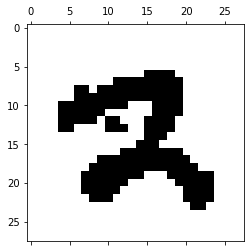

In [16]:
for i in range(4,len(rez)):
    
    plt.spy(np.reshape(rez[i][0], (28,28)))
    print(rez[i][1])
    print(rez[i][2])
    break

In [58]:
ret = torch.from_numpy(np.array(ret)).type(torch.LongTensor)

ValueError: only one element tensors can be converted to Python scalars

In [47]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test = np.array(test)
print(test.shape)

(28000, 784)


In [56]:
model_alex = mlp

In [57]:
model_alex.eval()
result = []
for i in test:
    image = np.reshape(i, (1, 1, 28,28))
    image = torch.from_numpy(image).type(torch.LongTensor)
    image = Variable(image).float()
    output = model_alex(image)
    result.append(int(np.argmax(output.data, axis = 1)))

In [60]:
wer = pd.DataFrame(np.concatenate((range_x, result), axis = 1), columns = ['ImageId', 'Label'])
wer.to_csv('new_test_1.csv', index = False)

In [58]:
range_x = np.reshape(np.array(range(1, len(result) +1)), (len(result), 1))

In [59]:
result = np.reshape(np.array(result), (len(result), 1))


In [45]:
wer.head()
pd.io.formats.

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
